In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pickle
import tensorflow as tf
import pandas as pd
import numpy as np
import glob

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import load_model
from tensorflow.data import Dataset
from keras.callbacks import EarlyStopping
import keras

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
import os
cwd = os.getcwd()   
print(cwd)

/content


In [ ]:
# # old code
# sound_data = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/0001-1000_mfcc_EDA_data")
# sound_data.head(5)

In [4]:
df_list = []
for filename in glob.glob("/content/drive/MyDrive/Colab Notebooks/Code for submission/ML Pickle Jar/*"):
  print("Processing " + filename)
  df = pd.read_pickle(filename)
  df_list.append(df)

all_data = pd.concat(df_list, axis=0)
all_data.count()

Processing /content/drive/MyDrive/Colab Notebooks/Code for submission/ML Pickle Jar/1000-2000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/Code for submission/ML Pickle Jar/2000-3000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/Code for submission/ML Pickle Jar/3000-4000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/Code for submission/ML Pickle Jar/4000-5000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/Code for submission/ML Pickle Jar/5000-6000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/Code for submission/ML Pickle Jar/6000-7000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/Code for submission/ML Pickle Jar/0001-1000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/Code for submission/ML Pickle Jar/7000-8000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/Code for submission/ML Pickle Jar/8000-9000_mfcc_EDA_data
Processing /content/drive/My

filename              73465
text                  73465
up_votes              73465
down_votes            73465
age                   73465
gender                73465
accent                63163
mean_RMSE             73465
mean_spec_centroid    73465
mfcc                  73465
meanff                72999
q1                    73465
iqr                   73465
chroma                73465
mel                   73465
dtype: int64

In [5]:
sound_data = all_data.copy()

In [6]:
sound_data = sound_data.drop(columns=['up_votes','down_votes','text','accent'])
sound_data.head()

,filename,age,gender,mean_RMSE,mean_spec_centroid,mfcc,meanff,q1,iqr,chroma,mel
1000,cv-valid-train/sample-002750.mp3,thirties,male,0.025066,2333.515420,"[[-653.66547, -553.5895, -507.24734, -510.7036...",178.808002,0.409884,1.012415,"[0.675646, 0.7073074, 0.61221164, 0.6449339, 0...","[0.0029826183, 0.0051411446, 0.008285743, 0.01..."
1001,cv-valid-train/sample-002756.mp3,fifties,female,0.086192,1875.045261,"[[-351.88895, -266.37778, -290.86395, -292.594...",381.535309,0.782728,1.497800,"[0.5251165, 0.53022057, 0.5565261, 0.5294604, ...","[0.039002493, 0.20496942, 4.5200353, 11.305368..."
1002,cv-valid-train/sample-002762.mp3,thirties,female,0.002153,3797.429451,"[[-854.9337, -840.2629, -825.6537, -820.5658, ...",239.809806,0.079895,0.135348,"[0.6472252, 0.6041823, 0.6314197, 0.62660223, ...","[9.714776e-06, 5.468462e-06, 5.4659545e-06, 6...."
1003,cv-valid-train/sample-002763.mp3,seventies,male,0.009721,2595.827243,"[[-630.77386, -536.9595, -541.82056, -642.6946...",126.877179,1.101018,1.920628,"[0.59890276, 0.58788294, 0.5915688, 0.59512645...","[0.00011609932, 0.00013558251, 0.00068590173, ..."
1004,cv-valid-train/sample-002765.mp3,fourties,male,0.013881,2043.898864,"[[-736.3709, -693.187, -660.3091, -656.9877, -...",140.803452,0.964515,1.134937,"[0.6100764, 0.6250077, 0.68134856, 0.71180815,...","[0.0014744281, 0.0017879839, 0.02412793, 0.357..."


In [7]:
sound_data.reset_index(drop=True, inplace=True)   

In [8]:
sound_data.drop(sound_data[sound_data["gender"]=="other"].index, inplace=True)

In [9]:
sound_data.drop(columns=["filename"], inplace=True)

In [10]:
age_dict = {
    "teens": 0,
    "twenties": 1,
    "thirties": 2,
    "fourties": 3,
    "fifties": 4,
    "sixties": 5,
    "seventies": 6,
    "eighties": 7
}
gender_dict = {
    "male": 0,
    "female": 1
}

for i in range(sound_data.shape[0]):
  sound_data["age"].iloc[i] = age_dict[sound_data["age"].iloc[i]]
  sound_data["gender"].iloc[i] = gender_dict[sound_data["gender"].iloc[i]]

sound_data.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,age,gender,mean_RMSE,mean_spec_centroid,mfcc,meanff,q1,iqr,chroma,mel
0,2,0,0.025066,2333.515420,"[[-653.66547, -553.5895, -507.24734, -510.7036...",178.808002,0.409884,1.012415,"[0.675646, 0.7073074, 0.61221164, 0.6449339, 0...","[0.0029826183, 0.0051411446, 0.008285743, 0.01..."
1,4,1,0.086192,1875.045261,"[[-351.88895, -266.37778, -290.86395, -292.594...",381.535309,0.782728,1.497800,"[0.5251165, 0.53022057, 0.5565261, 0.5294604, ...","[0.039002493, 0.20496942, 4.5200353, 11.305368..."
2,2,1,0.002153,3797.429451,"[[-854.9337, -840.2629, -825.6537, -820.5658, ...",239.809806,0.079895,0.135348,"[0.6472252, 0.6041823, 0.6314197, 0.62660223, ...","[9.714776e-06, 5.468462e-06, 5.4659545e-06, 6...."
3,6,0,0.009721,2595.827243,"[[-630.77386, -536.9595, -541.82056, -642.6946...",126.877179,1.101018,1.920628,"[0.59890276, 0.58788294, 0.5915688, 0.59512645...","[0.00011609932, 0.00013558251, 0.00068590173, ..."
4,3,0,0.013881,2043.898864,"[[-736.3709, -693.187, -660.3091, -656.9877, -...",140.803452,0.964515,1.134937,"[0.6100764, 0.6250077, 0.68134856, 0.71180815,...","[0.0014744281, 0.0017879839, 0.02412793, 0.357..."


### Gender

In [11]:
def get_np_means(arr):
  return np.mean(arr.T, axis=0)

In [12]:
gender_data = sound_data.copy()


# np.mean() mfccs
gender_data["mfcc"] = gender_data["mfcc"].apply(get_np_means)
gender_data = gender_data.dropna()
gender_data.head()

,age,gender,mean_RMSE,mean_spec_centroid,mfcc,meanff,q1,iqr,chroma,mel
0,2,0,0.025066,2333.515420,"[-393.8289, 85.47335, 1.4228904, 24.578445, -1...",178.808002,0.409884,1.012415,"[0.675646, 0.7073074, 0.61221164, 0.6449339, 0...","[0.0029826183, 0.0051411446, 0.008285743, 0.01..."
1,4,1,0.086192,1875.045261,"[-363.5393, 78.68751, -9.93091, 9.993607, -15....",381.535309,0.782728,1.497800,"[0.5251165, 0.53022057, 0.5565261, 0.5294604, ...","[0.039002493, 0.20496942, 4.5200353, 11.305368..."
2,2,1,0.002153,3797.429451,"[-708.3258, 44.437115, 37.39505, 11.696047, -2...",239.809806,0.079895,0.135348,"[0.6472252, 0.6041823, 0.6314197, 0.62660223, ...","[9.714776e-06, 5.468462e-06, 5.4659545e-06, 6...."
3,6,0,0.009721,2595.827243,"[-529.4351, 81.02429, 5.8359385, 28.622475, -8...",126.877179,1.101018,1.920628,"[0.59890276, 0.58788294, 0.5915688, 0.59512645...","[0.00011609932, 0.00013558251, 0.00068590173, ..."
4,3,0,0.013881,2043.898864,"[-516.62335, 108.33303, 18.175974, 20.33933, -...",140.803452,0.964515,1.134937,"[0.6100764, 0.6250077, 0.68134856, 0.71180815,...","[0.0014744281, 0.0017879839, 0.02412793, 0.357..."


In [13]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.legend_handler import HandlerLine2D

In [14]:
single_data_columns = ["mean_RMSE","mean_spec_centroid","meanff","q1","iqr"]

combined = gender_data[single_data_columns].values
y = gender_data['gender']
# print(combined)


xs_raw = []

for i in range(gender_data.shape[0]):
  mfcc = gender_data["mfcc"].iloc[i]
  chroma = gender_data["chroma"].iloc[i]
  mel = gender_data["mel"].iloc[i]
  combined_stats = combined[i]

  xs_raw.append(np.concatenate((
      combined_stats,
      mfcc,
      chroma,
      mel), axis=0))
  
xs_raw = np.array(xs_raw)
print(xs_raw)
print(xs_raw.shape)
x = pd.DataFrame.from_records(xs_raw)

[[2.50655767e-02 2.33351542e+03 1.78808002e+02 ... 4.22360936e-05
  1.92060543e-05 1.31902630e-06]
 [8.61921087e-02 1.87504526e+03 3.81535309e+02 ... 1.62144227e-06
  7.14589817e-07 5.00375350e-08]
 [2.15272792e-03 3.79742945e+03 2.39809806e+02 ... 5.28863939e-06
  9.51967593e-07 1.53635611e-08]
 ...
 [3.49693485e-02 2.09002172e+03 1.31681293e+02 ... 3.39935534e-04
  9.07320500e-05 7.50682648e-06]
 [2.74989884e-02 2.47999615e+03 2.17378584e+02 ... 4.85678262e-04
  9.98327887e-05 4.51164624e-06]
 [6.60601584e-03 2.15442749e+03 1.24400531e+02 ... 7.34049252e-07
  2.26723259e-07 1.48708184e-08]]
(72228, 165)


In [15]:
y=y.astype('int')

In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state = 0)
os_x, os_y = oversampler.fit_sample(x, y)
x_train, x_test, y_train, y_test = train_test_split(os_x, os_y, test_size = 0.2, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# np.save("os_x", os_x)
# np.save("os_y", os_y)

In [17]:
ss = StandardScaler()
mm = MinMaxScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [19]:
def RF_model(n_estimators = 100, max_depth=None, min_samples_leaf=1, 
             max_features='auto', max_leaf_nodes=None, min_samples_split=2, random_state=0):
  
  rf_model = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth, 
                                    min_samples_leaf=min_samples_leaf, max_features=max_features, 
                                    max_leaf_nodes=max_leaf_nodes, min_samples_split=min_samples_split, random_state=0)
  rf_model.fit(x_train, y_train)
  y_train_pred = rf_model.predict(x_train)
  y_test_pred = rf_model.predict(x_test)

  return y_train_pred, y_test_pred


def print_report(y_train_pred, y_test_pred, target_names = ['class 0 - male', 'class 1 - female']):

  classification_report_train = classification_report(y_train, y_train_pred, target_names=target_names)
  accuracy_train = accuracy_score(y_train_pred, y_train)

  classification_report_test = classification_report(y_test, y_test_pred, target_names=target_names)
  accuracy_test = accuracy_score(y_test_pred, y_test)

  print("-" * 50)
  print("TRAIN")
  print("-" * 50)
  print("classification report: ")
  print(classification_report_train)
  print("accuracy score: " + str(accuracy_train))
  print("-" * 50)
  print("TEST")
  print("-" * 50)
  print("classification report: ") 
  print(classification_report_test)
  print("accuracy score: " + str(accuracy_test))

Default Model from SKLearn

In [ ]:
 y_train_pred, y_test_pred = RF_model()
 print_report(y_train_pred, y_test_pred)

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
                  precision    recall  f1-score   support

  class 0 - male       1.00      1.00      1.00     43396
class 1 - female       1.00      1.00      1.00     43240

        accuracy                           1.00     86636
       macro avg       1.00      1.00      1.00     86636
    weighted avg       1.00      1.00      1.00     86636

accuracy score: 1.0
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
                  precision    recall  f1-score   support

  class 0 - male       0.91      0.97      0.94     10752
class 1 - female       0.97      0.91      0.94     10908

        accuracy                           0.94     21660
       macro avg       0.94      0.94      0.94     21660
    weighted avg       0.94      0.94      0.94     21660

accuracy score:

Best n estimators

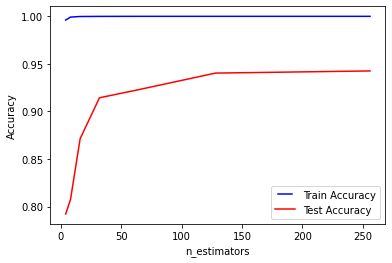

In [ ]:
train_results = []
test_results = []
n_estimators = [4, 8, 16, 32, 64, 128, 256]
best_estimator, acc = 0,0

for estimator in n_estimators:
    y_train_pred, y_test_pred = RF_model(n_estimators=estimator)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
      best_estimator, acc = estimator, accuracy_test


line1, = plt.plot(n_estimators, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(n_estimators, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()

Different Max Features

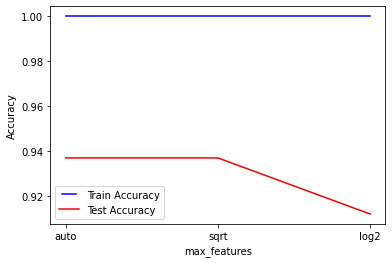

In [ ]:
train_results = []
test_results = []
max_features = ['auto','sqrt','log2']
best_feature, acc = 0,0

for feature in max_features:
    y_train_pred, y_test_pred = RF_model(max_features=feature)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
      best_feature, acc = feature, accuracy_test

line1, = plt.plot(max_features, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(max_features, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('max_features')
plt.show()

Different Min leafs

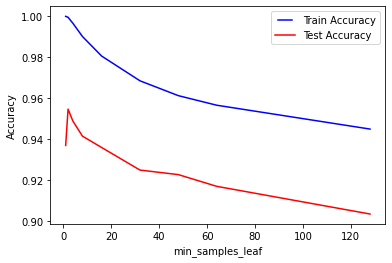

In [ ]:
train_results = []
test_results = []
min_samples_leaf = [1,2,4,8,16,32,48,64,128]
best_leaf, acc = 0,0

for leaf in min_samples_leaf:
    y_train_pred, y_test_pred = RF_model(min_samples_leaf = leaf)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
      best_leaf, acc = leaf, accuracy_test

line1, = plt.plot(min_samples_leaf, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leaf')
plt.show()

Different Max Depth

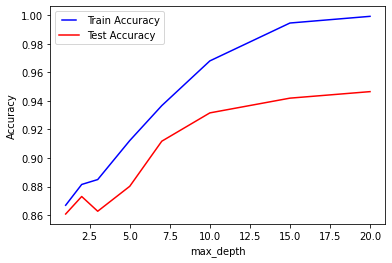

In [ ]:
train_results = []
test_results = []
max_depth = [1, 2, 3, 5, 7, 10, 15, 20]
best_depth, acc = 0,0

for depth in max_depth:
    y_train_pred, y_test_pred = RF_model(max_depth = depth)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
        best_depth, acc = depth, accuracy_test


line1, = plt.plot(max_depth, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(max_depth, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.show()

Different max_leaf_nodes

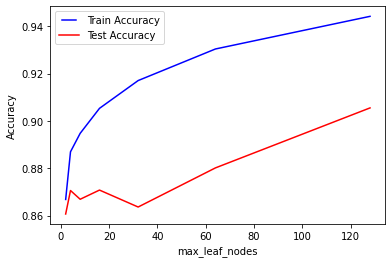

In [ ]:
train_results = []
test_results = []
max_leaf_nodes = [2, 4, 8, 16, 32, 64, 128]
best_max_leaf, acc = 0,0

for max_leaf in max_leaf_nodes:
    y_train_pred, y_test_pred = RF_model(max_leaf_nodes = max_leaf)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
        best_max_leaf, acc = max_leaf, accuracy_test


line1, = plt.plot(max_leaf_nodes, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(max_leaf_nodes, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('max_leaf_nodes')
plt.show()

Different min_samples_split

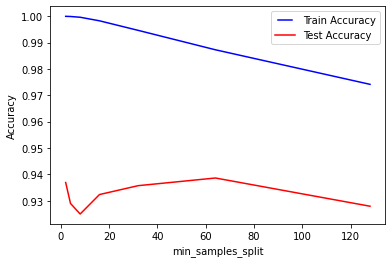

In [ ]:
train_results = []
test_results = []
min_samples_split = [2, 4, 8, 16, 32, 64, 128]
best_min_sample, acc = 0,0

for min_sample in min_samples_split:
    y_train_pred, y_test_pred = RF_model(min_samples_split = min_sample)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
        best_min_sample, acc = min_sample, accuracy_test


line1, = plt.plot(min_samples_split, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(min_samples_split, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_split')
plt.show()

BEST Model

In [ ]:
 y_train_pred, y_test_pred = RF_model(min_samples_split = best_min_sample, max_leaf_nodes = best_max_leaf, max_depth = best_depth,
                                      min_samples_leaf = best_leaf, max_features = best_feature, n_estimators = best_estimator)
 print_report(y_train_pred, y_test_pred)

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
                  precision    recall  f1-score   support

  class 0 - male       0.96      0.93      0.94     43396
class 1 - female       0.93      0.96      0.95     43240

        accuracy                           0.94     86636
       macro avg       0.95      0.94      0.94     86636
    weighted avg       0.95      0.94      0.94     86636

accuracy score: 0.9449305138741401
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
                  precision    recall  f1-score   support

  class 0 - male       0.97      0.84      0.90     10752
class 1 - female       0.86      0.97      0.91     10908

        accuracy                           0.91     21660
       macro avg       0.92      0.91      0.91     21660
    weighted avg       0.91      0.91      0.91     21660



In [ ]:
print(f"best_min_sample_split is 2")
print(f"best_max_leaf_node is None")
print(f"best_max_depth is None")
print(f"best_min_sample_leaf is 1")
print(f"best_max_feature is auto")
print(f"best_estimator is 100")

best_min_sample_split is 2
best_max_leaf_node is None
best_max_depth is None
best_min_sample_leaf is 1
best_max_feature is auto
best_estimator is 100


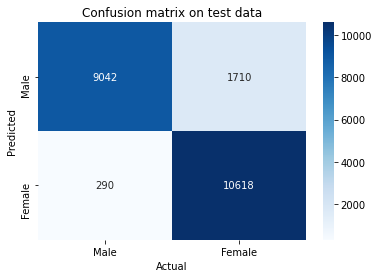

In [ ]:
#plot confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred) , index = ['Male', 'Female'] , columns = ['Male', 'Female'])
sns.heatmap(cm,cmap= 'Blues', annot = True, fmt='', xticklabels = ['Male', 'Female'], yticklabels = ['Male', 'Female'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix on test data')
plt.show()

# AGE

In [20]:
def get_np_means(arr):
  return np.mean(arr.T, axis=0)

In [21]:
age_data = sound_data.copy()

# np.mean() mfccs
age_data["mfcc"] = age_data["mfcc"].apply(get_np_means)
age_data = age_data.dropna()
age_data.head()

,age,gender,mean_RMSE,mean_spec_centroid,mfcc,meanff,q1,iqr,chroma,mel
0,2,0,0.025066,2333.515420,"[-393.8289, 85.47335, 1.4228904, 24.578445, -1...",178.808002,0.409884,1.012415,"[0.675646, 0.7073074, 0.61221164, 0.6449339, 0...","[0.0029826183, 0.0051411446, 0.008285743, 0.01..."
1,4,1,0.086192,1875.045261,"[-363.5393, 78.68751, -9.93091, 9.993607, -15....",381.535309,0.782728,1.497800,"[0.5251165, 0.53022057, 0.5565261, 0.5294604, ...","[0.039002493, 0.20496942, 4.5200353, 11.305368..."
2,2,1,0.002153,3797.429451,"[-708.3258, 44.437115, 37.39505, 11.696047, -2...",239.809806,0.079895,0.135348,"[0.6472252, 0.6041823, 0.6314197, 0.62660223, ...","[9.714776e-06, 5.468462e-06, 5.4659545e-06, 6...."
3,6,0,0.009721,2595.827243,"[-529.4351, 81.02429, 5.8359385, 28.622475, -8...",126.877179,1.101018,1.920628,"[0.59890276, 0.58788294, 0.5915688, 0.59512645...","[0.00011609932, 0.00013558251, 0.00068590173, ..."
4,3,0,0.013881,2043.898864,"[-516.62335, 108.33303, 18.175974, 20.33933, -...",140.803452,0.964515,1.134937,"[0.6100764, 0.6250077, 0.68134856, 0.71180815,...","[0.0014744281, 0.0017879839, 0.02412793, 0.357..."


In [22]:
age_data['age'].value_counts()

1    22331
2    18082
3    10787
4     9388
0     5257
5     4543
6     1601
7      239
Name: age, dtype: int64

In [23]:
age_data.drop(age_data[age_data.age == 6].index, inplace=True)
age_data.drop(age_data[age_data.age == 7].index, inplace=True)

In [24]:
y = age_data['age']
y=y.astype('int')

In [25]:
single_data_columns = ["mean_RMSE","mean_spec_centroid","meanff","q1","iqr"]

combined = gender_data[single_data_columns].values
# print(combined)



xs_raw = []

for i in range(age_data.shape[0]):
  mfcc = age_data["mfcc"].iloc[i]
  chroma = age_data["chroma"].iloc[i]
  mel = age_data["mel"].iloc[i]
  combined_stats = combined[i]

  xs_raw.append(np.concatenate((
      combined_stats,
      mfcc,
      chroma,
      mel), axis=0))
  
xs_raw = np.array(xs_raw)
print(xs_raw)
print(xs_raw.shape)
x = pd.DataFrame.from_records(xs_raw)

[[2.50655767e-02 2.33351542e+03 1.78808002e+02 ... 4.22360936e-05
  1.92060543e-05 1.31902630e-06]
 [8.61921087e-02 1.87504526e+03 3.81535309e+02 ... 1.62144227e-06
  7.14589817e-07 5.00375350e-08]
 [2.15272792e-03 3.79742945e+03 2.39809806e+02 ... 5.28863939e-06
  9.51967593e-07 1.53635611e-08]
 ...
 [1.08028222e-02 2.22676237e+03 1.21748693e+02 ... 3.39935534e-04
  9.07320500e-05 7.50682648e-06]
 [5.39751537e-02 2.69387736e+03 1.66434881e+02 ... 4.85678262e-04
  9.98327887e-05 4.51164624e-06]
 [9.74893291e-03 1.91390603e+03 1.02356288e+02 ... 7.34049252e-07
  2.26723259e-07 1.48708184e-08]]
(70388, 165)


In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state = 0)
os_x, os_y = oversampler.fit_sample(x, y)
x_train, x_test, y_train, y_test = train_test_split(os_x, os_y, test_size = 0.2, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
ss = StandardScaler()
mm = MinMaxScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

Default Model

In [ ]:
 y_train_pred, y_test_pred = RF_model()
 print_report(y_train_pred, y_test_pred, target_names=None)

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17949
           1       1.00      1.00      1.00     17925
           2       1.00      1.00      1.00     17777
           3       1.00      1.00      1.00     17844
           4       1.00      1.00      1.00     17887
           5       1.00      1.00      1.00     17806

    accuracy                           1.00    107188
   macro avg       1.00      1.00      1.00    107188
weighted avg       1.00      1.00      1.00    107188

accuracy score: 1.0
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.99      0.47      0.63      4382
           1       0.31      0.75      0.44      4406
           

Best n estimators

0.36704231659079034
0.44447346816926636
0.48813344279423837
0.5136950518695425
0.5367191581461304
0.5488842450929173
0.5643331591909844


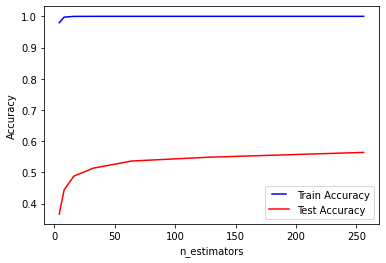

In [28]:
train_results = []
test_results = []
n_estimators = [4, 8, 16, 32, 64, 128, 256]
best_estimator, acc = 0,0

for estimator in n_estimators:
    y_train_pred, y_test_pred = RF_model(n_estimators=estimator)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)
    print (accuracy_test)

    if accuracy_test > acc:
      best_estimator, acc = estimator, accuracy_test


line1, = plt.plot(n_estimators, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(n_estimators, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()

Different Max Features

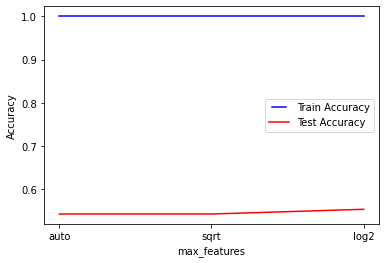

In [ ]:
train_results = []
test_results = []
max_features = ['auto','sqrt','log2']
best_feature, acc = 0,0

for feature in max_features:
    y_train_pred, y_test_pred = RF_model(max_features=feature)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
      best_feature, acc = feature, accuracy_test

line1, = plt.plot(max_features, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(max_features, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('max_features')
plt.show()

Different Min leafs

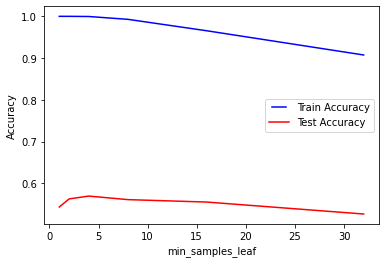

In [ ]:
train_results = []
test_results = []
min_samples_leaf = [1,2,4,8,16,32]
best_leaf, acc = 0,0

for leaf in min_samples_leaf:
    y_train_pred, y_test_pred = RF_model(min_samples_leaf = leaf)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
      best_leaf, acc = leaf, accuracy_test

line1, = plt.plot(min_samples_leaf, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leaf')
plt.show()

Different Max Depth

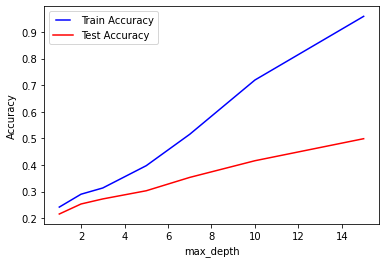

In [ ]:
train_results = []
test_results = []
max_depth = [1, 2, 3, 5, 7, 10, 15]
best_depth, acc = 0,0

for depth in max_depth:
    y_train_pred, y_test_pred = RF_model(max_depth = depth)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
        best_depth, acc = depth, accuracy_test


line1, = plt.plot(max_depth, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(max_depth, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.show()

Different max_leaf_nodes

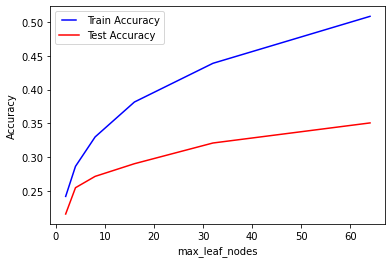

In [29]:
train_results = []
test_results = []
max_leaf_nodes = [2, 4, 8, 16, 32, 64, None]
best_max_leaf, acc = 0,0

for max_leaf in max_leaf_nodes:
    y_train_pred, y_test_pred = RF_model(max_leaf_nodes = max_leaf)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
        best_max_leaf, acc = max_leaf, accuracy_test


line1, = plt.plot(max_leaf_nodes, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(max_leaf_nodes, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('max_leaf_nodes')
plt.show()

Different min_samples_split

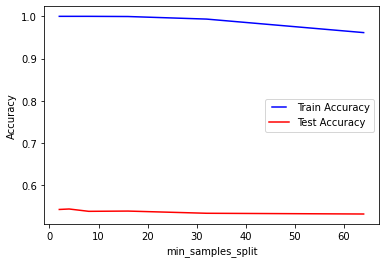

In [ ]:
train_results = []
test_results = []
min_samples_split = [2, 4, 8, 16, 32, 64]
best_min_sample, acc = 0,0

for min_sample in min_samples_split:
    y_train_pred, y_test_pred = RF_model(min_samples_split = min_sample)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    train_results.append(accuracy_train)

    accuracy_test = accuracy_score(y_test_pred, y_test)
    test_results.append(accuracy_test)

    if accuracy_test > acc:
        best_min_sample, acc = min_sample, accuracy_test


line1, = plt.plot(min_samples_split, train_results, 'b', label = 'Train Accuracy')
line2, = plt.plot(min_samples_split, test_results, 'r', label = 'Test Accuracy')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_split')
plt.show()

BEST Model

In [34]:
 y_train_pred, y_test_pred = RF_model(min_samples_split = best_min_sample, max_leaf_nodes = best_max_leaf, max_depth = best_depth,
                                      min_samples_leaf = best_leaf, max_features = best_feature, n_estimators = best_estimator)

print_report(y_train_pred, y_test_pred, target_names=None)

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17949
           1       0.89      0.93      0.91     17925
           2       0.94      0.90      0.92     17777
           3       0.94      0.96      0.95     17844
           4       0.98      0.96      0.97     17887
           5       0.99      1.00      0.99     17806

    accuracy                           0.95    107188
   macro avg       0.95      0.95      0.95    107188
weighted avg       0.95      0.95      0.95    107188

accuracy score: 0.9541739746986603
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.94      0.49      0.64      4382
           1       0.41      0.58      0.48      4

In [35]:
print(f"best_min_sample_split is {best_min_sample}")
print(f"best_max_leaf_node is {best_max_leaf}")
print(f"best_max_depth is {best_depth}")
print(f"best_min_sample_leaf is {best_leaf}")
print(f"best_max_feature is {best_feature}")
print(f"best_estimator is {best_estimator}")

best_min_sample_split is 4
best_max_leaf_node is None
best_max_depth is 15
best_min_sample_leaf is 4
best_max_feature is log2
best_estimator is 256


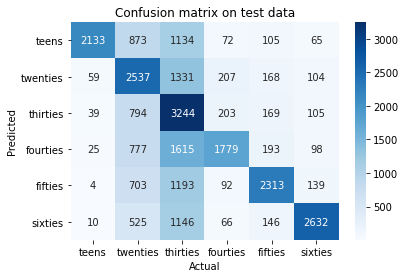

In [36]:
#plot confusion matrix for age

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred) , index = ['teens','twenties','thirties','fourties','fifties','sixties'] , columns = ['teens','twenties','thirties','fourties','fifties','sixties'])
sns.heatmap(cm,cmap= 'Blues', annot = True, fmt='', xticklabels = ['teens','twenties','thirties','fourties','fifties','sixties'], yticklabels = ['teens','twenties','thirties','fourties','fifties','sixties'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix on test data')
plt.show()